In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf

import warnings 
warnings.filterwarnings('ignore')

2022-01-26 19:54:30.653944: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-26 19:54:30.653968: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()
print("-" * 30)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 no

In [6]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

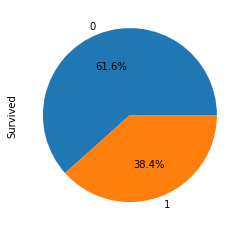

In [7]:
train_data['Survived'].value_counts().plot.pie(autopct= '%1.1f%%');

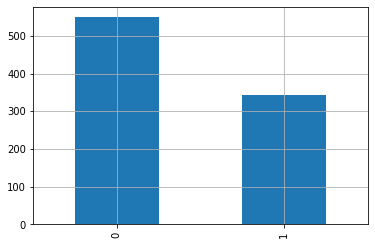

In [8]:
train_data['Survived'].value_counts().plot.bar();
plt.grid()

In [9]:
train_data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


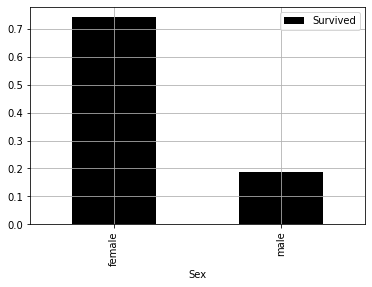

In [10]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(color = 'black');
plt.grid()

In [11]:
train_data[['Pclass', 'Survived']].value_counts()

Pclass  Survived
3       0           372
1       1           136
3       1           119
2       0            97
        1            87
1       0            80
dtype: int64

In [12]:
train_data[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


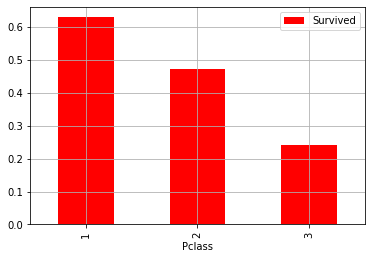

In [13]:
train_data[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar(color = 'red');
plt.grid()

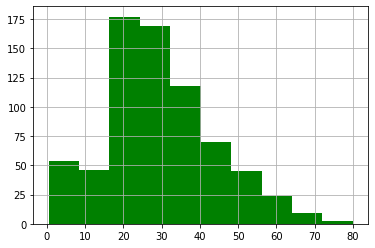

In [14]:
age_data = train_data[train_data['Age'].notna()][['Age', 'Survived']]
plt.hist(age_data['Age'], color = 'green')
plt.grid()

In [15]:
sum(train_data['Survived'].isnull())

0

In [16]:
train_data['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [17]:
sum(train_data['Age'].isnull())

177

In [18]:
train_data = train_data.dropna()

In [19]:
sum(train_data['Age'].isnull())

0

In [20]:
test_data = test_data.dropna()

In [21]:
sum(test_data['Age'].isnull())

0

In [22]:
full_data = pd.concat([train_data, test_data], axis=0)

In [23]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [24]:
data=full_data.drop(['Cabin','Name','Ticket','PassengerId','Embarked','SibSp','Fare','Parch','Sex'],axis=1)

In [25]:
data.head()

,Survived,Pclass,Age
1,1.0,1,38.0
3,1.0,1,35.0
6,0.0,1,54.0
10,1.0,3,4.0
11,1.0,1,58.0


In [26]:
train = data[data['Survived'].notnull()]
test = data[data['Survived'].isnull()]
targets = train['Survived']
train.drop('Survived', axis=1, inplace=True)
test.drop('Survived', axis=1, inplace=True)

X_train,X_val,Y_train,Y_val = train_test_split(train,targets,test_size = 0.2,random_state = 42)

In [27]:
x = X_train
y = Y_train
L1=20
L2=20
L3=5
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(L1,input_shape=(X_train.shape[1],),kernel_regularizer='l2', activation='relu'))
model.add(tf.keras.layers.Dense(L2,kernel_regularizer='l2', activation='relu'))
model.add(tf.keras.layers.Dense(L3,kernel_regularizer='l2', activation='relu'))
model.add(tf.keras.layers.Dense(1,kernel_regularizer='l2', activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=100)

2022-01-26 19:54:33.076004: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-01-26 19:54:33.076068: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (das): /proc/driver/nvidia/version does not exist
2022-01-26 19:54:33.076753: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
5/5 [==============================] - 1s 1ms/step - loss: 14.6303 - accuracy: 0.3151
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 12.6438 - accuracy: 0.3151
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 10.7710 - accuracy: 0.3151
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 9.3204 - accuracy: 0.3151
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 8.0059 - accuracy: 0.3151
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 6.7844 - accuracy: 0.3151
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 5.6568 - accuracy: 0.3151
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 4.4828 - accuracy: 0.3151
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 3.4529 - accuracy: 0.3151
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 2.5234 - accuracy: 0.3151
Epoch 11/100
5/5 [========

5/5 [==============================] - 0s 1ms/step - loss: 0.7747 - accuracy: 0.6849
Epoch 85/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7744 - accuracy: 0.6849
Epoch 86/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7745 - accuracy: 0.6849
Epoch 87/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7729 - accuracy: 0.6849
Epoch 88/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7723 - accuracy: 0.6849
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7721 - accuracy: 0.6849
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7712 - accuracy: 0.6849
Epoch 91/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7706 - accuracy: 0.6849
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7700 - accuracy: 0.6849
Epoch 93/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7695 - accuracy: 0.6849
Epoch 94/100
5/5 [===============

In [28]:
preds = model.evaluate(x=X_val, y=Y_val)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
print ("Training Accuracy = " + str(history.history['accuracy'][-1]))

2/2 [==============================] - 0s 2ms/step - loss: 0.8196 - accuracy: 0.6216
Loss = 0.819573163986206
Test Accuracy = 0.6216216087341309
Training Accuracy = 0.6849315166473389
